#### 7.1

(960, 624)


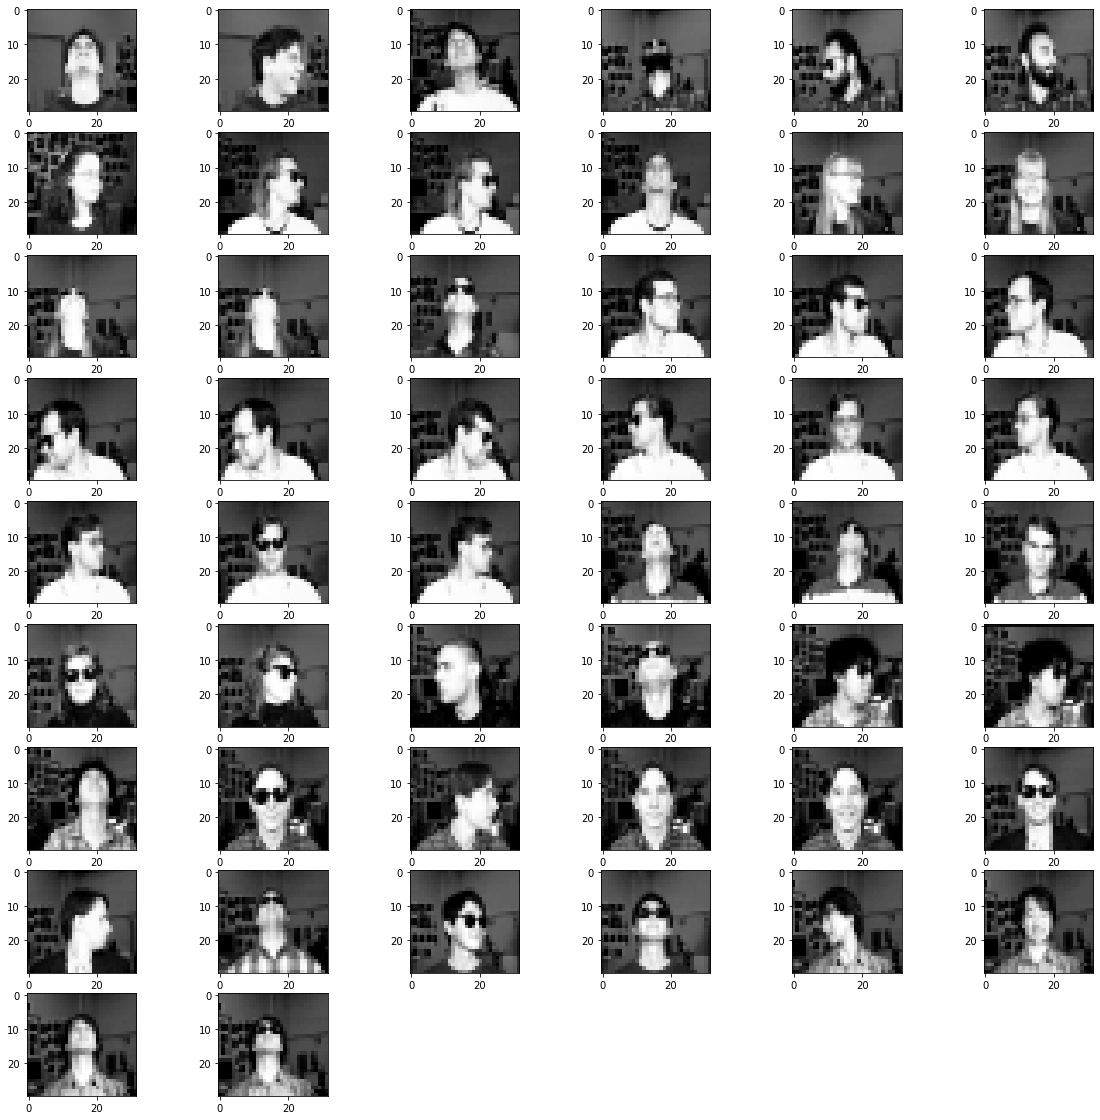

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import random
import re

def ReadFaces():
    datasetdir = "faces_4"
    listofimages = list()
    for filename in glob.glob(os.path.join(datasetdir, '**','*.pgm')):
        with open(filename, 'rb') as f:
            buffer = f.read()
        try:
            header, width, height, maxval = re.search(
                b"(^P5\s(?:\s*#.*[\r\n])*"
                b"(\d+)\s(?:\s*#.*[\r\n])*"
                b"(\d+)\s(?:\s*#.*[\r\n])*"
                b"(\d+)\s(?:\s*#.[!]*[\r\n]\s)*)", buffer).groups()
            image = np.frombuffer(buffer,
                                dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                                count=int(width)*int(height),
                                offset=len(header)
                                )#.reshape((int(height), int(width)))
        except AttributeError:
            raise ValueError("Not a raw PGM file: '%s'" % filename)
        except ValueError:
            raise ValueError("Not fitting in buffer for file: '%s'" % filename)
        listofimages.append(image)
    facesarray = np.array(listofimages).T
    return facesarray

facesarray = ReadFaces()
print(facesarray.shape)
fig, ax = plt.subplots()
width = 20
height = 20
totalfigures = 50
figindices = np.sort(random.sample(np.arange(0,624).tolist(),totalfigures))
fig.set_figwidth(width)
fig.set_figheight(height)
totalnumberoffigures = totalfigures
nrow = totalnumberoffigures/6 + 1 
ncol = 6
i = 1
for figureindex in figindices:
    plt.subplot(nrow,ncol,i)
    i+=1
    plt.imshow(facesarray[:,figureindex].reshape(30,32), cmap='Greys_r')
plt.show()

Clearly the dimensions are 960 and the number of files are 624. This produces lot of variability which cannot be discerned well. In short this situation can give rise to lot of noise which makes any analysis like classification difficult.

#### 7.2

components shape: (624, 624)
singular values shape: (624,)


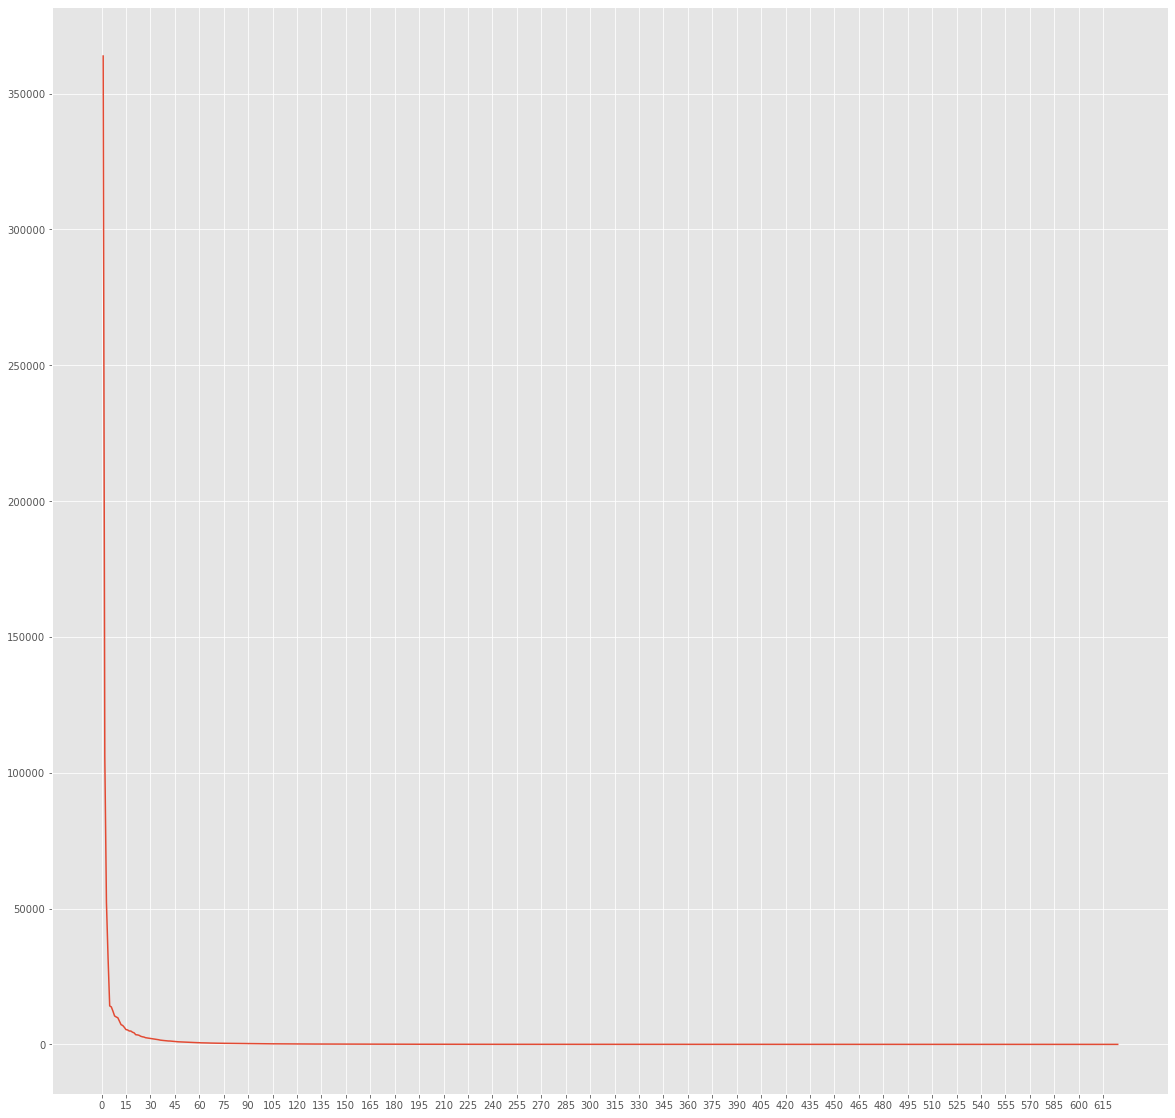

In [3]:
def PlotVariability(facesarray):
    from sklearn.decomposition import PCA
    model = PCA().fit(facesarray)
    print("components shape:",model.components_.shape)
    print("singular values shape:",model.explained_variance_.shape)
    plt.style.use('ggplot')
    width = 20
    height = 20
    plt.figure(figsize=(width, height))
    numberofsingularvalues = len(model.explained_variance_)
    plt.plot(np.arange(1,numberofsingularvalues+1),model.explained_variance_)
    plt.xticks(np.arange(0,numberofsingularvalues,15))

PlotVariability(facesarray)

From the above plot it is clear that 30 to 45 singular values really explain most of the variability which means only 4.8% to 7.2% of the 624 components explain most of the variability of the data.

#### 7.3

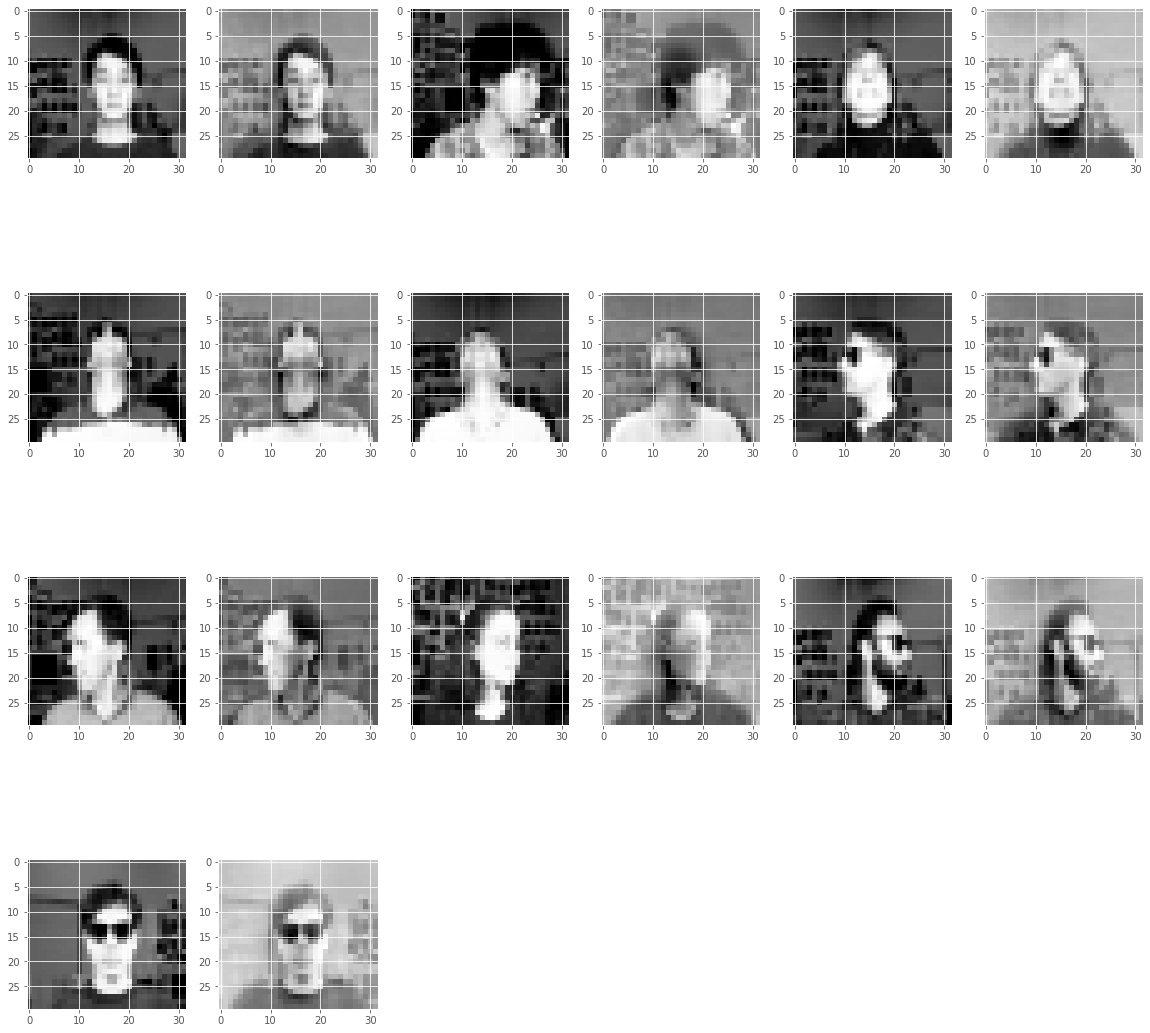

In [4]:
import random
from sklearn.decomposition import PCA
averagefacevector = np.mean(facesarray,axis=1)
model = PCA().fit(facesarray)
numberofsingularvalues = len(model.explained_variance_)
componentindices = np.sort(random.sample(np.arange(0,numberofsingularvalues).tolist(),10))
componentindices = np.sort(componentindices)[::-1]
fig, ax = plt.subplots()
width = 20
height = 20
fig.set_figwidth(width)
fig.set_figheight(height)
totalnumberoffigures = len(componentindices)*2
nrow = totalnumberoffigures/6 + 1 
ncol = 6
i = 1
averagefacevector = np.mean(facesarray,axis=1)
meanfacearray = (facesarray.T - averagefacevector.T).T
for component in componentindices:
    plt.subplot(nrow,ncol,i)
    i+=1
    plt.imshow(facesarray[:,component].reshape(30,32), cmap='Greys_r')
    plt.subplot(nrow,ncol,i)
    i+=1
    currentcomponent = model.components_[:,component]
    currentcomponent
    eigenface = model.components_[:,component]
    eigenface =np.append(eigenface,[0]*(960-624)) #pad it for multiplication since eigenface is lower rank
    reconstructedface = (eigenface*facesarray[:,component]*eigenface)+meanfacearray[:,component]
    plt.imshow(reconstructedface.reshape(30,32),cmap="Greys_r")
plt.show()

The detail in the reconstructed eigenface is little blurred but only with dominant features of the image.

#### 7.4

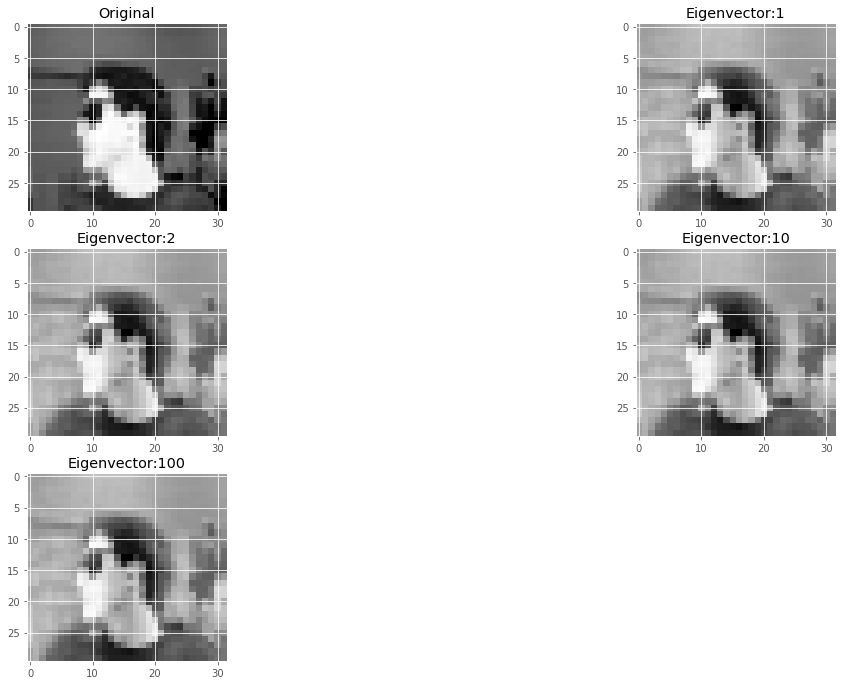

In [5]:
face = facesarray[:,0]
fig, ax = plt.subplots()
width = 20
height = 20
fig.set_figwidth(width)
fig.set_figheight(height)
plotcounter=1
plt.subplot(5,2,plotcounter)
plt.imshow(face.reshape(30,32),cmap='Greys_r')
plt.title("Original")
for i in [1,2,10,100]:
    plotcounter+=1
    plt.subplot(5,2,plotcounter)
    eigenface = model.components_[:,i]
    eigenface =np.append(eigenface,[0]*(960-624)) #pad it for multiplication since eigenface is lower rank
    reconstructedface = (eigenface*face*eigenface)+meanfacearray[:,0]
    plt.imshow(reconstructedface.reshape(30,32),cmap="Greys_r")
    plt.title("Eigenvector:{0}".format(i))
plt.show()

From the above we can observe that the features captured by first few eigenvectors is prominent.